In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Part 1:
#### a) Scatter data on life expectancy and GDP
##### Assumptions: 

In [2]:
df = pd.read_csv('./Resources/lex.csv')
df2 =pd.read_csv('./Resources/gdp(percapita)(PPP).csv')

gdp = df2.set_index([df2['geo'],df2['time']])
lex = df.set_index([df['geo'],df['time']])
lex.drop(columns=['geo','time'],inplace =True)
gdp.drop(columns=['geo','time'],inplace =True)
lex_gdp = lex.merge(gdp, left_index=True,right_index=True)
lex_gdp.rename(columns={'life_expectancy_at_birth':'LEX','income_per_person_gdppercapita_ppp_inflation_adjusted':'GDP'},inplace=True)

def scatter(df,targetx,targety):
    x = df[targetx] 
    y = df[targety]
    plt.figure(figsize=(16, 8))
    plt.scatter(x,y)
    plt.title('Life expectancy vs GDP per capita Inflation adjusted')
    plt.ylabel('Life Expectancy (Years)')
    plt.xlabel('GDP (PPP) in USD$')
    return plt

def getDFYear(df,year):
    dtindex = df.index.get_level_values(1)
    return df.iloc[dtindex.get_loc(year)]

<module 'matplotlib.pyplot' from 'c:\\Users\\Johan Birgersson\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

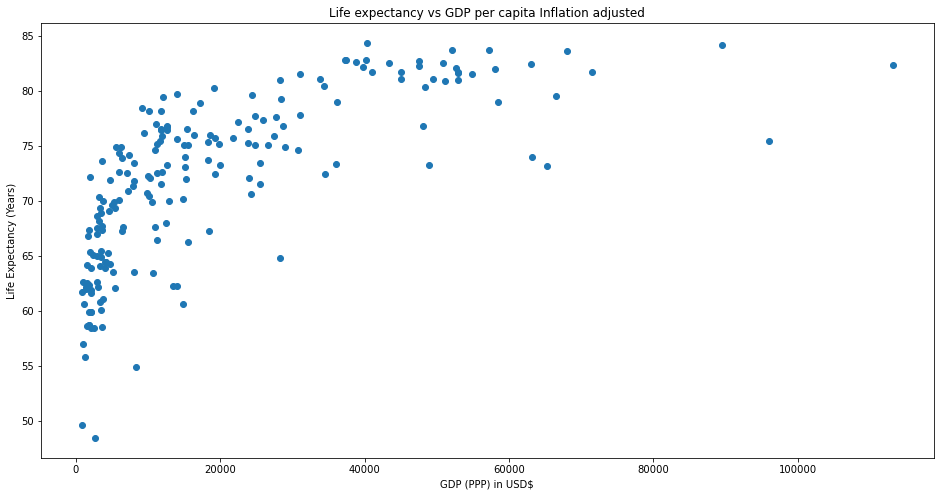

In [3]:
scatter(getDFYear(lex_gdp,2015),'GDP','LEX')



#### b) Scatter data on life expectancy and GDP
##### Assumptions:

#### c) Did you do any data cleaning (e.g., by removing entries that you think are not useful) for the task of drawing scatter plot(s) and the task of answering the questions d, e, f, and g? If so, explain what kind of entries that you chose to remove and why.
#####

##### d) Which countries have a life expectancy higher than one standard deviation above the mean?


In [14]:
import statistics as stats
import numpy as np


def deviatingEntries(df,target,stepsize,direction):
    dftemp = df
    dftemp.dropna()
    mean = stats.mean(dftemp[target])
    stdev = dftemp[target].std()
    print('Mean:', mean)
    print('Std:',stdev)
    if direction == 'above':
        filtered_df = dftemp[(dftemp[target] > (mean+stdev*stepsize))]
        return filtered_df.sort_values(by=[target])
    if direction == 'below':
        filtered_df = dftemp[(dftemp[target] <= (mean-stdev*stepsize))]
        return filtered_df.sort_values(by=[target])

    


In [5]:
deviatingEntries(getDFYear(lex_gdp,2015),'LEX',1,'above')

Mean: 71.87651282051281
Std: 7.645017590722971


,,LEX,GDP
geo,time,,
mco,2015,79.55,66540
chl,2015,79.63,24440
col,2015,79.69,14096
cri,2015,80.20,19142
twn,2015,80.32,48437
cyp,2015,80.45,34453
deu,2015,80.88,51159
grc,2015,80.92,28260
dnk,2015,80.99,52893


e) Which countries have high life expectancy but have low GDP?

In [6]:

HLLGDP = deviatingEntries(getDFYear(lex_gdp,2015),'LEX',1,'above').merge(deviatingEntries(getDFYear(lex_gdp,2015),'GDP',1,'below'),on ='geo')
HLLGDP.drop(columns=['LEX_y','GDP_y'], inplace= True)
HLLGDP.rename(columns={'LEX_x':'LEX','GDP_x':'GDP'},inplace = True)

HLLGDP


Mean: 71.87651282051281
Std: 7.645017590722971
Mean: 19516.733333333334
Std: 20263.59964538176


,LEX,GDP
geo,,
chl,79.63,24440
col,79.69,14096
cri,80.20,19142
cyp,80.45,34453
grc,80.92,28260
svn,81.03,33800
prt,81.54,31119
kor,82.61,38829
isr,82.74,37306


##### f)

#### g)

#### Part 2:
##### a)

Hello

In [13]:
happy_data = pd.read_csv('./Resources/Happiness-WVS-vs-Gallup.csv')
corruption = pd.read_csv('./Resources/corruption.csv')

happy_data = happy_data[['Year','Entity', 'Life satisfaction in Cantril Ladder (World Happiness Report 2022)']]
happy_data.rename(columns={'Life satisfaction in Cantril Ladder (World Happiness Report 2022)':'Happiness'},inplace=True)
happy_data_10y = happy_data.loc[(happy_data['Year']>2000) & (happy_data['Year']<2010)]



In [15]:
happy_data_10y_zim = happy_data_10y.loc[happy_data_10y['Entity']=='Zimbabwe']
happy_data_10y_zim= happy_data_10y_zim.dropna().sort_values(by='Year')
happy_data_10y_tan = happy_data_10y.loc[happy_data_10y['Entity']=='Tanzania']
happy_data_10y_tan = happy_data_10y_tan.dropna().sort_values(by='Year')
happy_data_10y_fin = happy_data_10y.loc[happy_data_10y['Entity']=='Finland']
happy_data_10y_fin= happy_data_10y_fin.dropna().sort_values(by='Year')
happy_data_10y_den = happy_data_10y.loc[happy_data_10y['Entity']=='Denmark']
happy_data_10y_den= happy_data_10y_den.dropna().sort_values(by='Year')

In [16]:
corr_zim = corruption.loc[corruption['Jurisdiction'] =='Zimbabwe']
corr_zim = corr_zim.melt()
corr_zim= corr_zim.drop([0])
corr_zim = corr_zim.loc[(corr_zim['variable'].astype(float)>=2000) & (corr_zim['variable'].astype(float)<=2010)]
corr_zim.rename(columns={'variable':'Year','value':'Corruption'},inplace=True)
corr_zim['Entity'] ='Zimbabwe'
corr_zim= corr_zim.sort_values(by='Year')


corr_tan = corruption.loc[corruption['Jurisdiction'] =='Tanzania']
corr_tan = corr_tan.melt()
corr_tan= corr_tan.drop([0])
corr_tan = corr_tan.loc[(corr_tan['variable'].astype(float)>=2000) & (corr_tan['variable'].astype(float)<=2010)]
corr_tan.rename(columns={'variable':'Year','value':'Corruption'},inplace=True)
corr_tan['Entity'] ='Tanzania'
corr_tan= corr_tan.sort_values(by='Year')


corr_fin = corruption.loc[corruption['Jurisdiction'] =='Finland']
corr_fin = corr_fin.melt()
corr_fin= corr_fin.drop([0])
corr_fin = corr_fin.loc[(corr_fin['variable'].astype(float)>=2000) & (corr_fin['variable'].astype(float)<=2010)]
corr_fin.rename(columns={'variable':'Year','value':'Corruption'},inplace=True)
corr_fin['Entity'] ='Finland'
corr_fin= corr_fin.sort_values(by='Year')

corr_den = corruption.loc[corruption['Jurisdiction'] =='Denmark']
corr_den = corr_den.melt()
corr_den= corr_den.drop([0])
corr_den = corr_den.loc[(corr_den['variable'].astype(float)>=2000) & (corr_den['variable'].astype(float)<=2010)]
corr_den.rename(columns={'variable':'Year','value':'Corruption'},inplace=True)
corr_den['Entity'] ='Denmark'
corr_den= corr_den.sort_values(by='Year')


corr_zim
happy_data_10y_zim

,Year,Entity,Happiness
56714,2004,Zimbabwe,3.826268
56715,2005,Zimbabwe,3.280247
56716,2006,Zimbabwe,3.174264
56717,2007,Zimbabwe,4.055914
56718,2008,Zimbabwe,4.681570
56719,2009,Zimbabwe,4.845642


In [18]:
countries = ['Denmark','Finland','Zimbabwe','Tanzania']

def fooMerger(df1,df2):
    df1['Year'] = df1['Year'].astype(int)
    df2['Year'] = df2['Year'].astype(int)
    return pd.merge_asof(df1.sort_values(by ='Year'),df2.sort_values(by ='Year'), by='Entity',on='Year')



zim = fooMerger(corr_zim,happy_data_10y_zim)
tan = fooMerger(corr_tan,happy_data_10y_tan)
fin = fooMerger(corr_fin,happy_data_10y_fin)
den = fooMerger(corr_den,happy_data_10y_den)


print(len(zim))

print(len(tan))

print(len(fin))

print(len(den))
    

11
11
11
11


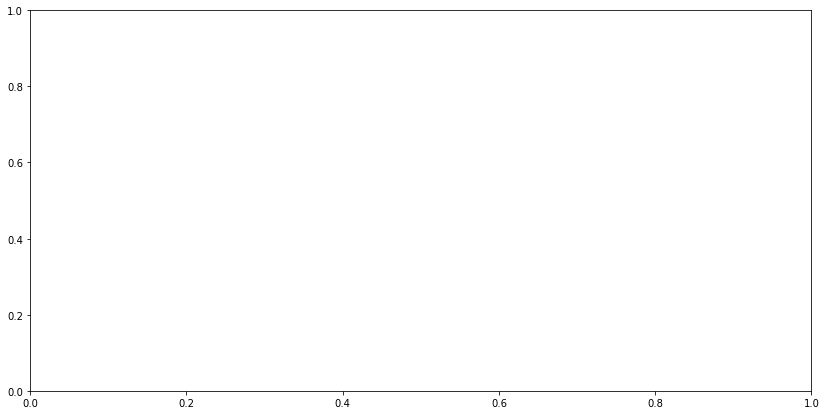

In [25]:
fig, ax1 = plt.subplots(figsize=(14,7))

zx1 = zim['Year']
zx2 = zim['Year']
zy1 = zim['Corruption']
zy2 = zim['Happiness']

tx1 = tan['Year']
tx2 = tan['Year']
ty1 = tan['Corruption']
ty2 = tan['Happiness']

sx1 = fin['Year']
sx2 = fin['Year']
sy1 = fin['Corruption']
sy2 = fin['Happiness']

dx1 = den['Year']
dx2 = den['Year']
dy1 = den['Corruption']
dy2 = den['Happiness']



    

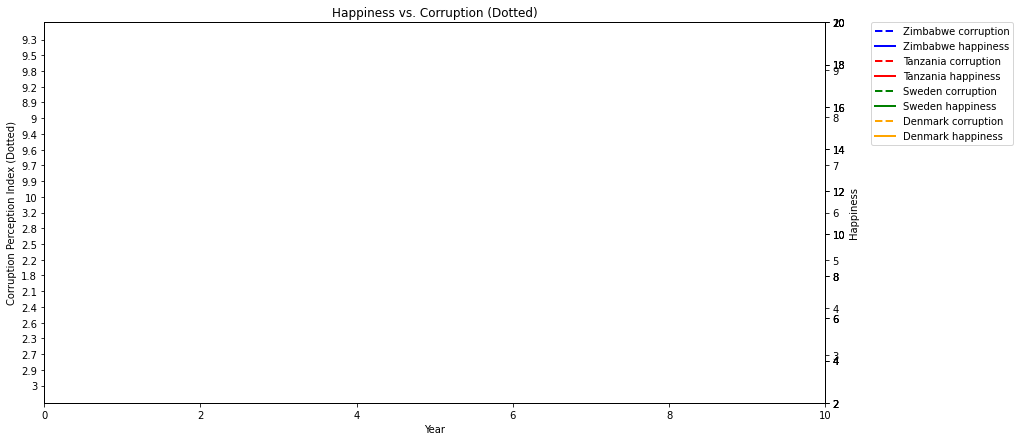

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(14,7))

# Zimbabwe
pz1, = ax1.plot(zx1, zy1, '--', color='blue', linewidth=2, label='Zimbabwe corruption')
# second y-axis for Zimbabwe
ax2 = ax1.twinx()
pz2,= ax2.plot(zx2, zy2,color='blue', linewidth=2, label='Zimbabwe happiness')
ax2.set_ylim([2, 10])
ax2.set_xlim([0,10])

# Tanzania
pt1, = ax1.plot(tx1, ty1, '--', color='red', linewidth=2, label='Tanzania corruption')
ax2  = ax1.twinx()
pt2, = ax2.plot(tx2, ty2,color='red', linewidth=2, label='Tanzania happiness')
ax2.set_ylim([2, 20])

# Sweden 
ps1, = ax1.plot(sx1, sy1, '--', color='green', linewidth=2, label='Sweden corruption')
ax2  = ax1.twinx()
ps2, = ax2.plot(sx2, sy2,color='green', linewidth=2, label='Sweden happiness')
ax2.set_ylim([2, 20])

# Denmark 
pd1, = ax1.plot(dx1, dy1, '--', color='orange', linewidth=2, label='Denmark corruption')
ax2  = ax1.twinx()
pd2, = ax2.plot(dx2, dy2,color='orange', linewidth=2, label='Denmark happiness')
ax2.set_ylim(2, 20)


ax1.set_xlabel("Year")
ax1.set_ylabel("Corruption Perception Index (Dotted)")
ax2.set_ylabel("Happiness")
plt.title('Happiness vs. Corruption (Dotted)')

# Legend
fig.legend(handles=[pz1,pz2,pt1,pt2,ps1,ps2,pd1,pd2],bbox_to_anchor=(0.94,0.89), loc='upper left')

plt.show()

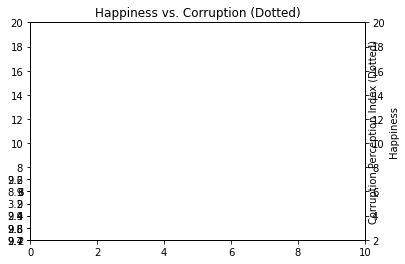

In [27]:
# Zimbabwe
pz1, = ax1.plot(zx1, zy1, '--', color='blue', linewidth=2, label='Zimbabwe corruption')
ax1 = plt.gca()
ax1.set_ylim([2, 20])
# second y-axis for Zimbabwe
ax2 = ax1.twinx()
pz2,= ax2.plot(zx2, zy2,color='blue', linewidth=2, label='Zimbabwe happiness')
ax2.set_ylim([2, 20])
ax2.set_xlim([0,10])

# Tanzania
pt1, = ax1.plot(tx1, ty1, '--', color='red', linewidth=2, label='Tanzania corruption')
ax1 = plt.gca()
ax1.set_ylim([2, 20])
ax2  = ax1.twinx()
pt2, = ax2.plot(tx2, ty2,color='red', linewidth=2, label='Tanzania happiness')
ax2.set_ylim([2, 20])

# Sweden 
ps1, = ax1.plot(sx1, sy1, '--', color='green', linewidth=2, label='Sweden corruption')
ax1 = plt.gca()
ax1.set_ylim([2, 20])
ax2  = ax1.twinx()
ps2, = ax2.plot(sx2, sy2,color='green', linewidth=2, label='Sweden happiness')
ax2.set_ylim([2, 20])

# Denmark 
pd1, = ax1.plot(dx1, dy1, '--', color='orange', linewidth=2, label='Denmark corruption')
ax1 = plt.gca()
ax1.set_ylim([2, 20])
ax2  = ax1.twinx()
pd2, = ax2.plot(dx2, dy2,color='orange', linewidth=2, label='Denmark happiness')
ax2.set_ylim(2, 20)


ax1.set_xlabel("Year")
ax1.set_ylabel("Corruption Perception Index (Dotted)")
ax2.set_ylabel("Happiness")
plt.title('Happiness vs. Corruption (Dotted)')

# Legend
fig.legend(handles=[pz1,pz2,pt1,pt2,ps1,ps2,pd1,pd2],bbox_to_anchor=(0.94,0.89), loc='upper left')

plt.show()